## Author- Mohammad Arsalan

## Task- In this project we have to predict the activity of a user whether a person is Laying, Standing , Sitting, Walking, Walking upstairs, or Walking downstairs.

### Importing some necessary libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
# Importing Machine Learning Algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score

## Reading train and test files

In [123]:
df_train = pd.read_csv(r"E:\Work Space\Ecko data\human activity recognition data set\train_csv\train.csv")
df_test = pd.read_csv(r"E:\Work Space\Ecko data\human activity recognition data set\test_csv\test.csv")

In [124]:
print(df_train.shape)
print(df_test.shape)

(7352, 563)
(2947, 563)


In [125]:
df_train.isnull().values.any()

False

In [126]:
df_test.isnull().values.any()

False

In [127]:
df_train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [128]:
df_test.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [129]:
y_train = df_train['Activity']
X_train = df_train.drop(columns = ['Activity', 'subject'])

In [130]:
y_test = df_test['Activity']
X_test = df_test.drop(columns=['Activity', 'subject'])

In [131]:
count_of_each_activity = np.array(y_train.value_counts())
print(count_of_each_activity)
activities = sorted(y_train.unique())
print(activities)

[1407 1374 1286 1226 1073  986]
['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


## Data Visualisation

([<matplotlib.patches.Wedge at 0x2200046cdc8>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

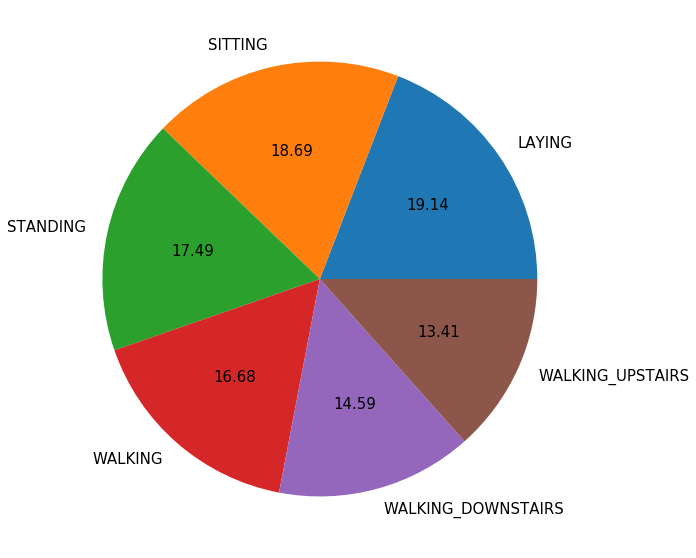

In [132]:
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 15})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

## Feature Scaling

In [133]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(7352, 561)
(2947, 561)


In [134]:
accuracy_scores = np.zeros(4)

## SVM

In [135]:
clf = SVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, y_pred)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

cm_svm = confusion_matrix(y_test, y_pred)
recall_score_svm=recall_score(y_test,y_pred,average='weighted')
f1_score_svm=f1_score(y_test,y_pred,average='weighted')
print('Confusion matrix:', cm_svm)
print('Recall Score:', recall_score_svm)
print('F1 Score:', f1_score_svm)

Support Vector Classifier accuracy: 95.18154054971157%
Confusion matrix: [[537   0   0   0   0   0]
 [  3 441  46   0   0   1]
 [  0  29 503   0   0   0]
 [  0   0   0 482   8   6]
 [  0   0   0   6 386  28]
 [  0   0   0  14   1 456]]
Recall Score: 0.9518154054971157
F1 Score: 0.9517112970334193


## Logistic Regression

In [136]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, y_pred)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

cm_lr = confusion_matrix(y_test, y_pred)
recall_score_lr=recall_score(y_test,y_pred,average='weighted')
f1_score_lr=f1_score(y_test,y_pred,average='weighted')
print('Confusion matrix:', cm_lr)
print('Recall Score:', recall_score_lr)
print('F1 Score:', f1_score_lr)

Logistic Regression accuracy: 95.41907024092298%
Confusion matrix: [[533   0   4   0   0   0]
 [  1 429  59   0   0   2]
 [  0  15 517   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   2   6 393  19]
 [  0   0   0  23   1 447]]
Recall Score: 0.9541907024092298
F1 Score: 0.9541070383865823


C:\Users\Arsalan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## KNN

In [137]:
clf = KNeighborsClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, y_pred)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

cm_knn = confusion_matrix(y_test, y_pred)
recall_score_knn=recall_score(y_test,y_pred,average='weighted')
f1_score_knn=f1_score(y_test,y_pred,average='weighted')
print('Confusion matrix:', cm_knn)
print('Recall Score:', recall_score_knn)
print('F1 Score:', f1_score_knn)

K Nearest Neighbors Classifier accuracy: 88.36104513064133%
Confusion matrix: [[514  14   9   0   0   0]
 [  3 374 113   0   0   1]
 [  0  35 497   0   0   0]
 [  0   0   0 483   9   4]
 [  0   0   0  61 316  43]
 [  0   0   0  43   8 420]]
Recall Score: 0.8836104513064132
F1 Score: 0.882687182794028


## Random Forest

In [138]:
clf = RandomForestClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, y_pred)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

cm_rf = confusion_matrix(y_test, y_pred)
recall_score_rf=recall_score(y_test,y_pred,average='weighted')
f1_score_rf=f1_score(y_test,y_pred,average='weighted')
print('Confusion matrix:', cm_rf)
print('Recall Score:', recall_score_rf)
print('F1 Score:', f1_score_rf)

Random Forest Classifier accuracy: 93.00984051577876%
Confusion matrix: [[537   0   0   0   0   0]
 [  0 443  48   0   0   0]
 [  0  39 493   0   0   0]
 [  0   0   0 481  10   5]
 [  0   0   0  26 353  41]
 [  0   0   0  32   5 434]]
Recall Score: 0.9300984051577876
F1 Score: 0.9298154349798305


Text(0.5, 1.0, 'Accuracy of various algorithms')

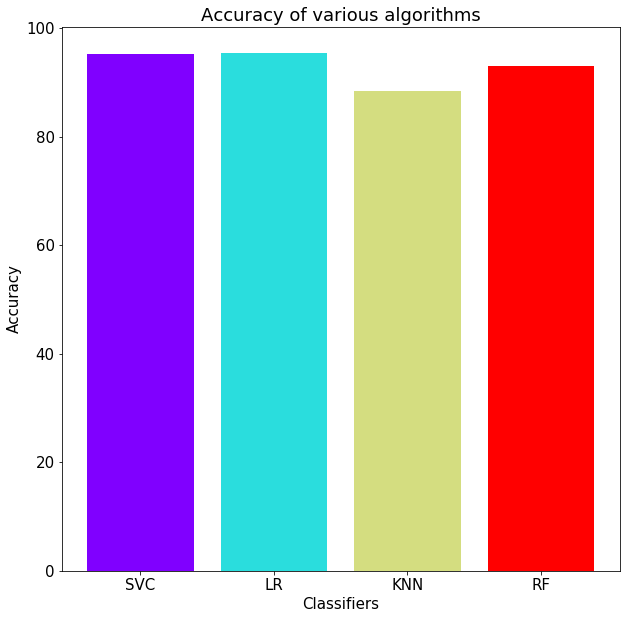

In [140]:
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['SVC', 'LR', 'KNN', 'RF']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')

# we can see from the above accuracy graph, the Logistic Regression algorithm and SVM performed the best with the accuracy of 95%.

# Thank you guys for watching!!!